<a href="https://colab.research.google.com/github/Jerez-lab/ML-course/blob/main/3_lab/03_linear_regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задача 1

Построить модель линейной регрессии.

* линейная модель
* полином второй степени
* полином третьей степени
* экспонента

Построить графики получившихся функций (линейная, квадратичная, кубическая, экспонента) и тренировочной выборки.

* Посчитать MSE для каждого случая
* Выбрать наилучший вариант (без тестовой выборки)

Для решения можете использовать np.linalg.lstsq, np.polyfit, np.poly1d, scipy.stats.linregress, scipy.optimize.curve_fit, sklearn.linear_model.LinearRegression, statsmodels, np.linalg.solve (аналитически) или с помощью стохастического градиентного спуска (написать самостоятельно).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

In [ ]:
y = np.array([12.19, 8.41, 14.68, 8.64, 32.94, 22.61, 45.92, 23.63, 18.59, 36.22, 50.10, 
              46.22, 23.63, 47.30, 40.03, 56.53, 38.41, 51.47, 6.29, 35.41, 67.79, 74.21, 79.12, 45.10])
x = np.linspace(0, 1, num = 24)

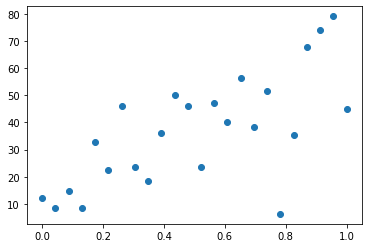

In [ ]:
plt.scatter(x, y);

In [ ]:
onesX = np.ones(len(x))

In [ ]:
X = np.array(list(zip(onesX, x)))
W_1 = np.linalg.lstsq(X, y, rcond=None)[0]

In [ ]:
X = np.array(list(zip(onesX, x, x*x)))
W_2 = np.linalg.lstsq(X, y, rcond=None)[0]

In [ ]:
X = np.array(list(zip(onesX, x, x*x, x*x*x)))
W_3 = np.linalg.lstsq(X, y, rcond=None)[0]

In [ ]:
W_exp = np.polyfit(x, np.log(y), 1)

In [ ]:
def linear(x, w):
    return w[0] + w[1]*x

def poly2(x, w): 
    return w[0] + w[1]*x + w[2]*x**2

def poly3(x, w): 
    return w[0] + w[1]*x + w[2]*x**2 + w[3]*x**3

def exp(x, w):
    return np.exp(w[0]) * np.exp(w[1]*x)

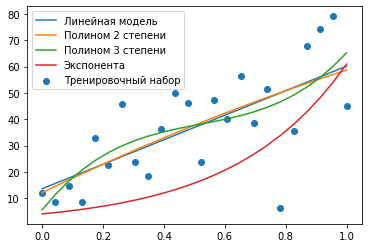

In [ ]:
plt.scatter(x, y, label='Тренировочный набор')
plt.plot(x, linear(x, W_1), label='Линейная модель')
plt.plot(x, poly2(x, W_2), label='Полином 2 степени')
plt.plot(x, poly3(x, W_3), label='Полином 3 степени')
plt.plot(x, exp(x, W_exp), label='Экспонента')
plt.legend();

In [ ]:
print("Среднеквадратическое отклонение у линейной модели : ", mean_squared_error(y, linear(x, W_1)))
print("Среднеквадратическое отклонение у полинома 2 степени: ", mean_squared_error(y, poly2(x, W_2)))
print("Среднеквадратическое отклонение у полинома 3 степени: ", mean_squared_error(y, poly3(x, W_3)))
print("Среднеквадратическое отклонение у экспоненты: ", mean_squared_error(y, exp(x, W_exp)))

Среднеквадратическое отклонение у линейной модели :  213.13469863888886
Среднеквадратическое отклонение у полинома 2 степени:  212.59353678557318
Среднеквадратическое отклонение у полинома 3 степени:  202.51303659090922
Среднеквадратическое отклонение у экспоненты:  482.01611836359916


Лучшая модель это полином 3 степени. Среднеквадратическое отклонение равно 202.5

## Задача 2

Данные: https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

1. Разделите данные на train/test или используйте кросс-валидацию (можно grid search)
2. Постройте несколько моделей линейной регрессии:


* sklearn.linear_model.LinearRegression
* sklearn.linear_model.Ridge
* sklearn.linear_model.Lasso
* sklearn.linear_model.ElasticNet


1. Для последних трёх вариантов попробуйте разные значения коэффициента регуляризации.
2. Сравните построенные модели по MSE на тестовой выборке (или через кросс-валидацию)
3. Какая модель оказалась наилучшей? Почему?

In [ ]:
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.3, random_state=42)

In [ ]:
diabetes_X.shape

(442, 10)

In [ ]:
LR = linear_model.LinearRegression()
Ridge = linear_model.Ridge()
Lasso = linear_model.Lasso() 
Elastic = linear_model.ElasticNet()

In [ ]:
MSE_lr_cv = cross_val_score(LR, diabetes_X, diabetes_y, cv=5, scoring="neg_mean_squared_error").mean()

In [ ]:
alpha = [0.00001,0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
param_grid = dict(alpha=alpha)

## Для Linear_model.Ridge()
grid = GridSearchCV(linear_model.Ridge(), param_grid=param_grid, scoring="neg_mean_squared_error").fit(X_train, y_train)
print(f"Linear_model.Ridge / {grid.best_params_} с лучшим результатом: {grid.best_score_}")

## Для Linear_model.Lasso()
grid = GridSearchCV(linear_model.Lasso(), param_grid=param_grid, scoring="neg_mean_squared_error").fit(X_train, y_train)
print(f"Linear_model.Lasso / {grid.best_params_} с лучшим результатом: {grid.best_score_}")

Linear_model.Ridge / {'alpha': 0.001} с лучшим результатом: -3165.6965443003737
Linear_model.Lasso / {'alpha': 0.001} с лучшим результатом: -3167.2801333126213


In [ ]:
MSE_ridge_cv = cross_val_score(linear_model.Ridge(alpha=0.001), diabetes_X, diabetes_y, cv=5,
                               scoring="neg_mean_squared_error").mean()
MSE_lasso_cv = cross_val_score(linear_model.Lasso(alpha=0.001), diabetes_X, diabetes_y, cv=5,
                               scoring="neg_mean_squared_error").mean()

In [ ]:
import warnings

warnings.filterwarnings('ignore')
   
    
param_grid = {
"alpha": [0.00001,0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
"l1_ratio": [0, 0.25, 0.5, 0.75, 1]
}
grid = GridSearchCV(linear_model.ElasticNet(), param_grid = param_grid, 
                    scoring="neg_mean_squared_error").fit(X_train, y_train)
print(f"Elastic / {grid.best_params_} with best score: {grid.best_score_}")

Elastic / {'alpha': 1e-05, 'l1_ratio': 0.25} with best score: -3165.348657838087


In [ ]:
MSE_elastic_cv = cross_val_score(linear_model.ElasticNet(alpha=0.00001, l1_ratio=0.25), diabetes_X, diabetes_y, cv=5,
                                 scoring="neg_mean_squared_error").mean()

In [ ]:
print("Линейная регрессия со средним Cv MSE: ", MSE_lr_cv)
print("Линейная регрессия с регуляризацией L1 со средним Cv MSE: ", MSE_lasso_cv)
print("Линейная регрессия с регуляризацией L2 со средним Cv MSE: ", MSE_ridge_cv)
print("ElasticNet со средним Cv MSE: ", MSE_elastic_cv)

Линейная регрессия со средним Cv MSE:  -2993.0729432998864
Линейная регрессия с регуляризацией L1 со средним Cv MSE:  -2993.121668315379
Линейная регрессия с регуляризацией L2 со средним Cv MSE:  -2993.0578194241816
ElasticNet со средним Cv MSE:  -2993.8554661044673


Лучшим результатом оказалась линейная регрессия с регуляризацией L2. Ridge регрессия лучше подходит в данной ситуации, так как мы имеем большое количество переменных, каждая из которых имеет небольшой эффект.